# Problem Statement
<p>A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.</p>

<p>A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. </p>


<p>In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.</p>

# Business Goal:
<p>You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. </p>

<p>They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:</p>

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the bike sharing dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_sharing = pd.read_csv('day.csv')

In [3]:
# Check the head of the dataset
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_sharing.shape

(730, 16)

In [5]:
# Check if any columns has null values
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Observation :** There are no missing values in dataset

In [6]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Preparation
converting feature values into categorical string values as mentioned in data dictionary

In [7]:
bike_sharing[bike_sharing['workingday']==1]['weekday'].value_counts()

2    103
3    102
4    102
5    102
1     90
Name: weekday, dtype: int64

Above output implies that 0:"sunday" and 6:"saturday"

In [8]:
bike_sharing['weekday']=bike_sharing[['weekday']].apply(lambda x : x.map({0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday', 6:'saturday'}))
bike_sharing['mnth']=bike_sharing[['mnth']].apply(lambda x : x.map({1:'jan', 2:'feb', 3:'march', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sept', 10:'oct', 11:'nov', 12:'dec'}))
bike_sharing['season']=bike_sharing[['season']].apply(lambda x : x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))
bike_sharing['weathersit']=bike_sharing[['weathersit']].apply(lambda x : x.map({1:'clear', 2:'cloudy', 3:'light_rain', 4:'heavy_rain'}))

In [9]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,saturday,0,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sunday,0,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- Columns need to drop
    - dteday : As data set already have columns like yr(year), mnth(month), weekday
    - instant : record index
    - casual & registered: As cnt is count of total rental bikes including both casual and registered

In [10]:
drop_cols = ['dteday', 'instant', 'casual', 'registered']
bike_sharing = bike_sharing.drop(drop_cols, axis=1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,saturday,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


Renaming columns for readability

In [11]:
bike_sharing.rename(columns={'yr': 'year', 'mnth': 'month', 'hum':'humidity'}, inplace=True)
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,saturday,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
bike_sharing.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

## Visualising the Data
Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

### Univariate Analysis

In [13]:
bike_sharing.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

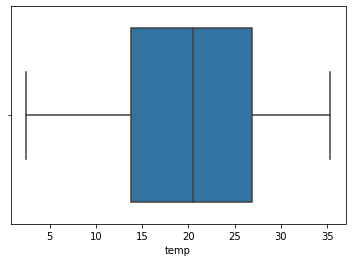

In [14]:
sns.boxplot(bike_sharing['temp'])
plt.show()

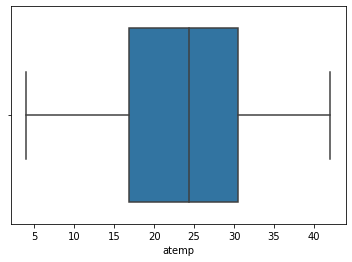

In [15]:
sns.boxplot(bike_sharing['atemp'])
plt.show()

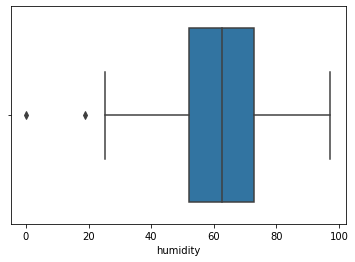

In [16]:
sns.boxplot(bike_sharing['humidity'])
plt.show()

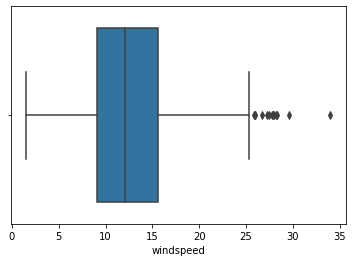

In [17]:
sns.boxplot(bike_sharing['windspeed'])
plt.show()

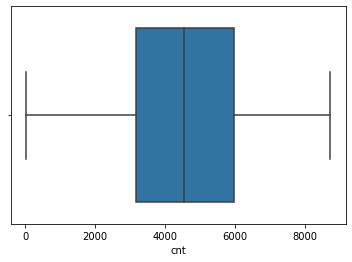

In [18]:
sns.boxplot(bike_sharing['cnt'])
plt.show()

### Bivariate Analysis
#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [19]:
bike_sharing.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

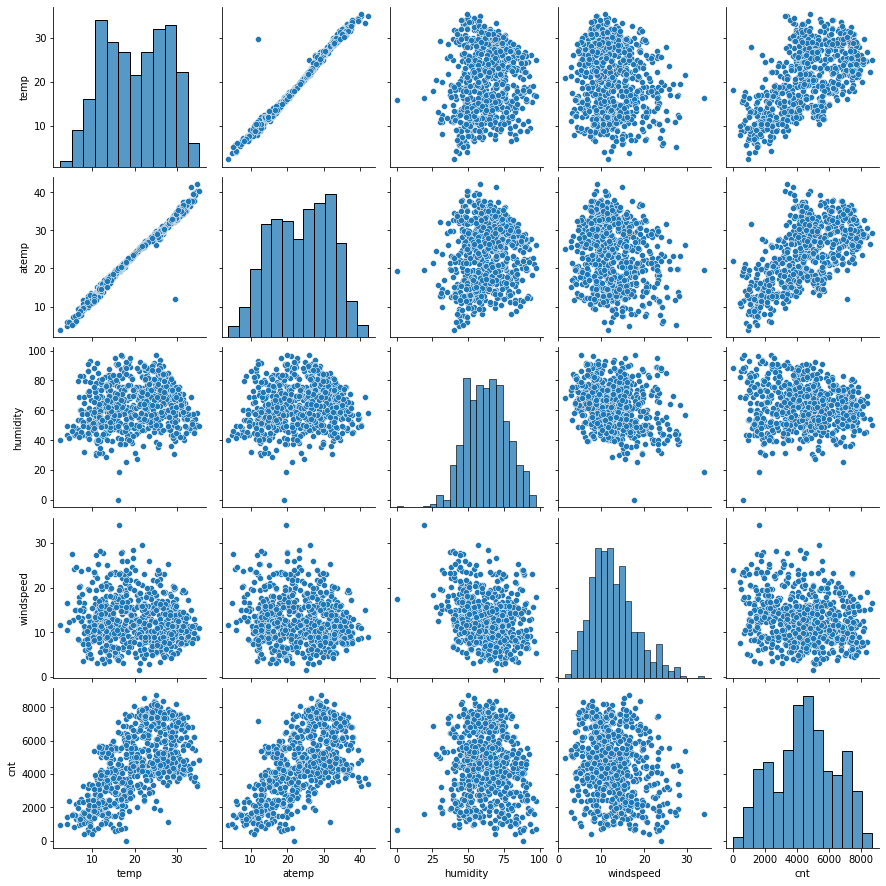

In [20]:
num_features = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']
sns.pairplot(bike_sharing[num_features])
plt.show()

**Observations :**
- `temp` and `atemp` are highly correlated with each other
- `temp` and `atemp` has high correlation with target variables with `cnt`

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

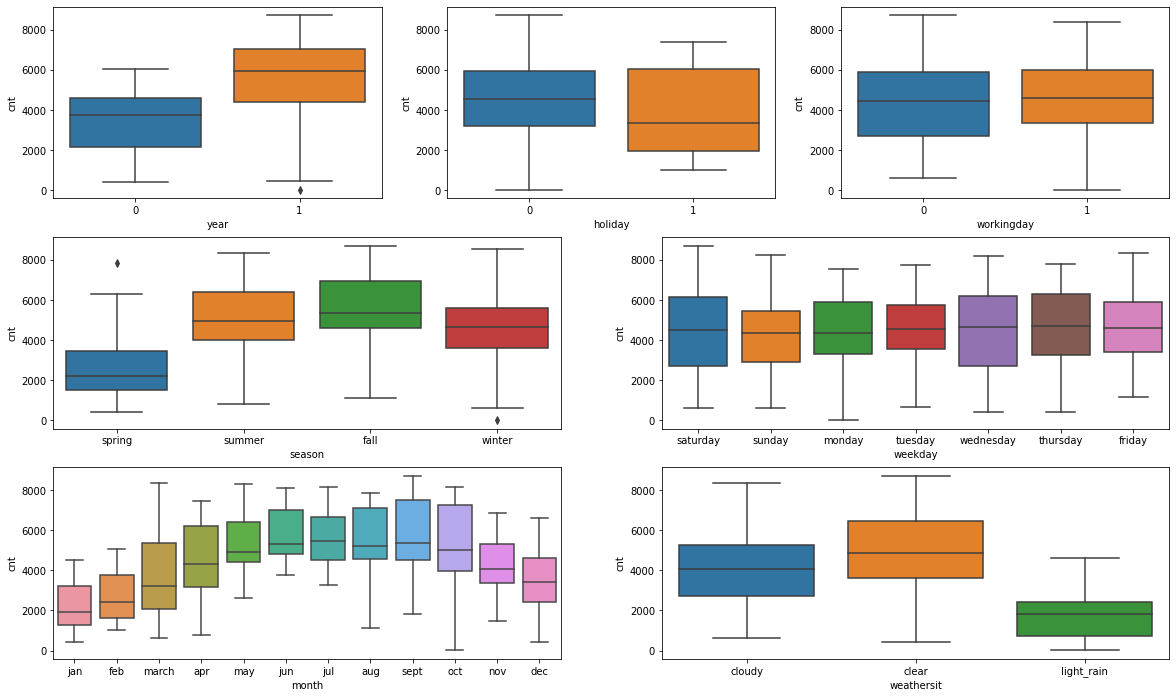

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'year', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(3,2,3)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(3,2,5)
sns.boxplot(x = 'month', y = 'cnt', data = bike_sharing)
plt.subplot(3,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.show()

**Observation:** As we can see 
- For `year` 2019, usage of bike sharing is increased.
- For `holidays` spread between 25th percentile and 75th persentile is more.
- For `workingday` and `weekends` 50th percentile is almost same.
- During summer, fall and winter `season` usage of bike sharing seems more than spring.
- Usage of shared bike is more during `month` march to oct.
- when there is heavy_rain no one is using shared bikes and for light_rain usage seems to be decreased than cloudy and clear `weathersit`.

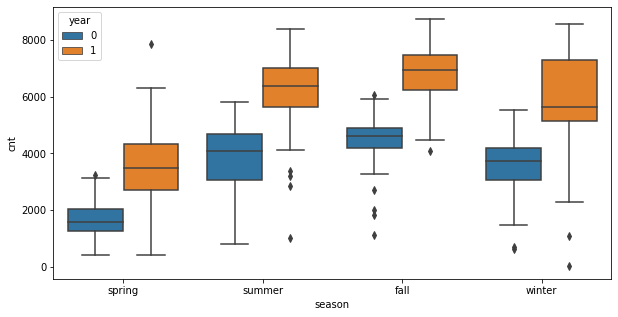

In [22]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'year', data = bike_sharing)
plt.show()

**Observation :** for each season usage seems to be more in `year` 2019 than 2018

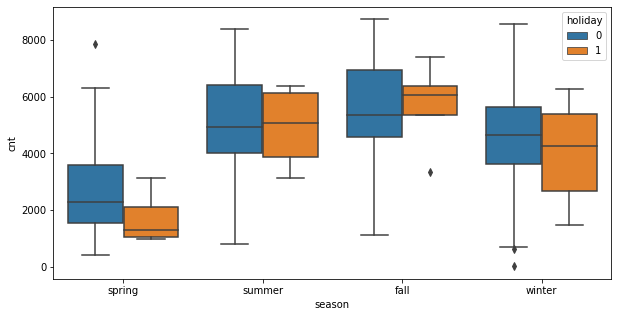

In [23]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = bike_sharing)
plt.show()

**Observation :**
- In `season` spring and winter 50th percentile for holiday 50th percentile below than working day and in `season` summmer and fall for holidays it is above than working
- For working daya 0-100th percentile is more than holiday.

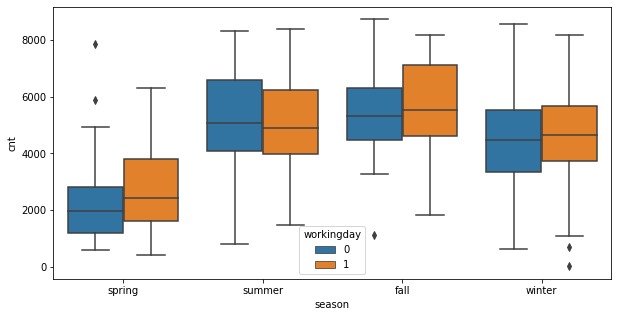

In [24]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = bike_sharing)
plt.show()

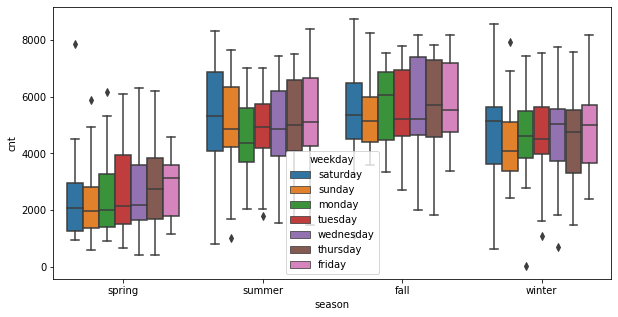

In [25]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weekday', data = bike_sharing)
plt.show()

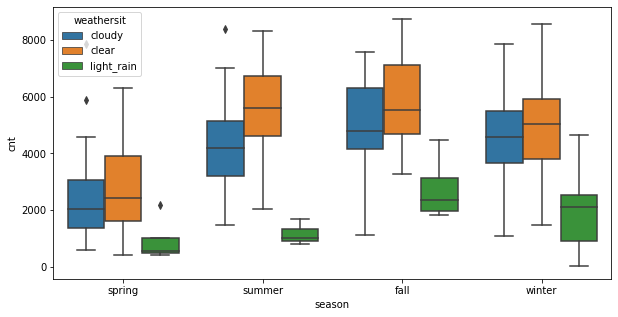

In [26]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bike_sharing)
plt.show()

In [27]:
print(bike_sharing['season'].value_counts())
print(bike_sharing['year'].value_counts())
print(bike_sharing['month'].value_counts())
print(bike_sharing['holiday'].value_counts())
print(bike_sharing['weekday'].value_counts())
print(bike_sharing['workingday'].value_counts())
print(bike_sharing['weathersit'].value_counts())

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
0    365
1    365
Name: year, dtype: int64
jan      62
march    62
may      62
jul      62
aug      62
oct      62
dec      62
apr      60
jun      60
sept     60
nov      60
feb      56
Name: month, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
saturday     105
sunday       105
monday       105
tuesday      104
thursday     104
friday       104
wednesday    103
Name: weekday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64
clear         463
cloudy        246
light_rain     21
Name: weathersit, dtype: int64


## Step 2: Data Preparation
As we can see features `year`, `holiday` and `workingday` are already has only 0 and 1 in there column as per our requirement of regression fit.

### Dummy Variables
Let convert other features `season`, `month`, `weekday` and `weathersit` which has level more the two levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [28]:
def create_dummies(df, cols):
    for col in cols:
        dummies_df = pd.get_dummies(df[col], drop_first = True)
        df = pd.concat([df, dummies_df], axis = 1)
        df.drop([col], axis = 1, inplace = True)
    return df

In [29]:
dummies = ['season', 'month', 'weekday', 'weathersit']
bike_sharing = create_dummies(bike_sharing, dummies)
bike_sharing.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy,light_rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## Step 3: Splitting the Data into Training and Testing Sets

In [30]:
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


## Step 4: Rescaling the Features 

We need to do rescaling the features so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
## $\frac{x_i-x_{min}}{x_{max}-x_{min}}$
2. Standardisation (mean-0, sigma-1)
## $\frac{x_i-\bar{x}}{\sigma}$

In this case we don't want our dataset to have negative values, hence we will use MinMax scaling.

In [32]:
scaler = MinMaxScaler()

In [33]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy,light_rain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0


In [35]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy,light_rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'march', 'may', 'nov', 'oct', 'sept', 'monday',
       'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday', 'cloudy',
       'light_rain'],
      dtype='object')

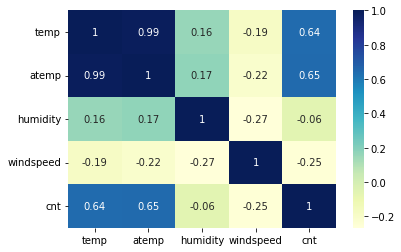

In [37]:
# Let's check the correlation coefficients to see which variables are highly correlated

df_t = df_train[['temp','atemp','humidity','windspeed','cnt']]

# plt.figure(figsize = (30, 30))
matrix = np.triu(df_t.corr())
sns.heatmap(df_t.corr(), annot = True, cmap="YlGnBu")
plt.show()

As we can see, `cnt` seems to the correlated to `temp` and `atemp` the most. Let's see a pairplot for
- `temp` vs `cnt`
- `atemp` vs `cnt`

**Note** : As feature `year` is not bussiness related factor no point to check scatter plot for it, 

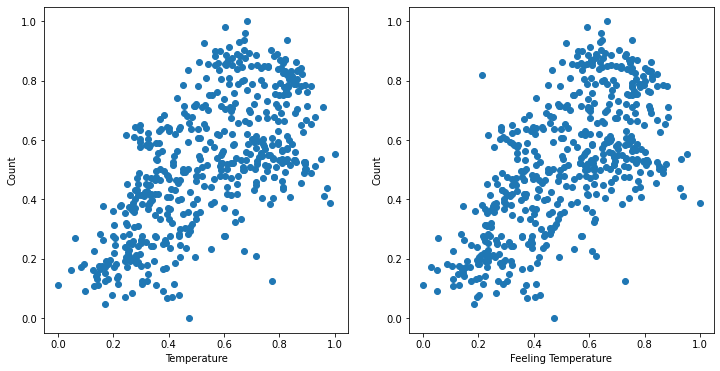

In [38]:
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.scatter(df_train['temp'], df_train['cnt'])
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.subplot(1,2,2)
plt.scatter(df_train['atemp'], df_train['cnt'])
plt.xlabel("Feeling Temperature")
plt.ylabel("Count")
plt.show()

So, it seem that `temperature` is playing an important roal in bike sharing business. And scatter plot for `temperature` and `atemperature` is almost same.

### Dividing into X and Y sets for the model building

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

For this assignment I am using RFE (Recursive Feature Elimination) method for creating model and for further feature elimination I will use manual method.

### VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

###  Cases to drop column as per p-value and VIF
1. Drop : High P-value, High VIF
2. High-Low OR Low-High
    1. High P-value, Low VIF (Remove these first)
    2. Low P-value, High VIF (Remove these after the one above)
3. Keep Low P-value, Low VIF

**Note**:
1. For P-value, anything greater than 0.05 is high.
2. For VIF, anything greater than 5 is high.

In [40]:
lm= LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

There are total 29 features other than `cnt`, so for RFE I am selecting 20 features.

In [41]:
rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 2),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 6),
 ('march', False, 7),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 5),
 ('sept', True, 1),
 ('monday', False, 4),
 ('saturday', True, 1),
 ('sunday', False, 3),
 ('thursday', False, 8),
 ('tuesday', False, 10),
 ('wednesday', False, 9),
 ('cloudy', True, 1),
 ('light_rain', True, 1)]

In [43]:
# Features selected by RFE method
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'spring', 'summer', 'winter', 'dec', 'feb', 'jan', 'jul',
       'may', 'nov', 'sept', 'saturday', 'cloudy', 'light_rain'],
      dtype='object')

In [44]:
# Features rejected by RFE
X_train.columns[~rfe.support_]

Index(['aug', 'jun', 'march', 'oct', 'monday', 'sunday', 'thursday', 'tuesday',
       'wednesday'],
      dtype='object')

### 1st Model

In [45]:
X_train_rfe = X_train[col]
# Building 1st model
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train, X_train_rfe).fit()

print(lr_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              897.1
Date:                Wed, 29 May 2024   Prob (F-statistic):                        0.00
Time:                        03:06:28   Log-Likelihood:                          496.59
No. Observations:                 510   AIC:                                     -953.2
Df Residuals:                     490   BIC:                                     -868.5
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [46]:
# Create function which will return a dataframe that contains the names of all the feature variables and their respective VIFs
def vif(X_train_rfe):
    vif = pd.DataFrame()
    vif['feature']=X_train_rfe.columns
    vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
    vif['vif']=round(vif['vif'],2)
    vif=vif.sort_values(by='vif', ascending=False)
    return vif

In [47]:
print(vif(X_train_rfe))

       feature     vif
3         temp  379.53
4        atemp  368.80
5     humidity   31.84
7       spring    5.73
2   workingday    5.39
6    windspeed    5.13
9       winter    4.28
8       summer    3.58
12         jan    2.40
18      cloudy    2.33
0         year    2.11
17    saturday    2.01
11         feb    1.92
15         nov    1.87
10         dec    1.69
13         jul    1.61
14         may    1.59
16        sept    1.43
19  light_rain    1.29
1      holiday    1.21


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `atemp` as it has a very high p-value of `0.939` and VIF is 368.80. Let's go ahead and drop this variables

### 2nd Model

In [48]:
# Droping feature 'atemp'
X_train_rfe = X_train_rfe.drop('atemp', axis=1)

# Building 2nd model
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train, X_train_rfe_sm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.59e-189
Time:                        03:06:28   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2985      0.038      7.774      0.0

In [49]:
print(vif(X_train_rfe))

       feature    vif
4     humidity  31.79
3         temp  19.84
6       spring   5.62
2   workingday   5.39
5    windspeed   4.88
8       winter   4.12
7       summer   3.43
11         jan   2.40
17      cloudy   2.33
0         year   2.10
16    saturday   2.01
10         feb   1.92
14         nov   1.87
9          dec   1.69
12         jul   1.60
13         may   1.59
15        sept   1.42
18  light_rain   1.28
1      holiday   1.21


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `may` as it has a very high p-value of `0.148`. Let's go ahead and drop this variables

### 3rd Model

In [50]:
# Droping feature 'may'
X_train_rfe = X_train_rfe.drop('may', axis=1)

# Building 3rd model
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train, X_train_rfe_sm).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.55e-190
Time:                        03:06:28   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2873      0.038      7.630      0.0

In [51]:
print(vif(X_train_rfe))

       feature    vif
4     humidity  31.76
3         temp  19.75
6       spring   5.61
2   workingday   5.38
5    windspeed   4.79
8       winter   4.12
7       summer   2.88
11         jan   2.40
16      cloudy   2.33
0         year   2.10
15    saturday   2.00
10         feb   1.92
13         nov   1.87
9          dec   1.69
12         jul   1.60
14        sept   1.42
17  light_rain   1.28
1      holiday   1.21


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `feb` as it has a very high p-value of `0.112`. Let's go ahead and drop this variables

### 4th Model

In [52]:
# Droping feature 'feb'
X_train_rfe = X_train_rfe.drop('feb', axis=1)

# Building 4th model
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_4 = sm.OLS(y_train, X_train_rfe_sm).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          9.55e-191
Time:                        03:06:28   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2759      0.037      7.452      0.0

In [53]:
print(vif(X_train_rfe))

       feature    vif
4     humidity  31.16
3         temp  19.14
2   workingday   5.37
5    windspeed   4.78
6       spring   4.57
8       winter   4.12
7       summer   2.87
15      cloudy   2.32
0         year   2.09
14    saturday   2.00
12         nov   1.84
10         jan   1.76
11         jul   1.59
9          dec   1.57
13        sept   1.42
16  light_rain   1.28
1      holiday   1.20


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `holiday` as it has a very high p-value of `0.054`. Let's go ahead and drop this variables

### 5th Model

In [54]:
# droping feature 'holiday'
X_train_rfe = X_train_rfe.drop('holiday', axis=1)

# Building 5th model
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_5 = sm.OLS(y_train, X_train_rfe_sm).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.53e-191
Time:                        03:06:28   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2694      0.037      7.286      0.0

In [55]:
print(vif(X_train_rfe))

       feature    vif
3     humidity  31.14
2         temp  18.94
4    windspeed   4.77
1   workingday   4.76
5       spring   4.50
7       winter   4.11
6       summer   2.86
14      cloudy   2.32
0         year   2.09
13    saturday   1.86
11         nov   1.81
9          jan   1.76
10         jul   1.59
8          dec   1.56
12        sept   1.41
15  light_rain   1.28


As you can see, first model has features with high VIF, as we droing features with high p-value we have only 2 features with high VIF.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `humidity  ` as it has a very high VIF of `31.41`. Let's go ahead and drop this variables

### 6th model

In [56]:
# droping feature 'humidity'
X_train_rfe = X_train_rfe.drop('humidity', axis=1)

# Building 6th model
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_6 = sm.OLS(y_train, X_train_rfe_sm).fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 29 May 2024   Prob (F-statistic):          5.71e-189
Time:                        03:06:28   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1999      0.033      6.084      0.0

In [57]:
print(vif(X_train_rfe))

       feature   vif
2         temp  6.92
1   workingday  4.73
3    windspeed  4.71
4       spring  3.09
6       winter  3.02
5       summer  2.32
0         year  2.08
12    saturday  1.86
10         nov  1.78
8          jan  1.67
9          jul  1.59
13      cloudy  1.57
7          dec  1.48
11        sept  1.35
14  light_rain  1.09


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `temp` as it has a very high VIF of `6.92`. Let's go ahead and drop this variables

### 7th Model

In [58]:
# droping feature 'temp'
X_train_rfe = X_train_rfe.drop('temp', axis=1)

# Building 7th model
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_7 = sm.OLS(y_train, X_train_rfe_sm).fit()

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     140.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          5.05e-162
Time:                        03:06:28   Log-Likelihood:                 447.16
No. Observations:                 510   AIC:                            -864.3
Df Residuals:                     495   BIC:                            -800.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5460      0.019     29.005      0.0

In [59]:
print(vif(X_train_rfe))

       feature   vif
2    windspeed  4.25
1   workingday  3.55
3       spring  3.03
5       winter  3.00
4       summer  2.25
0         year  1.91
9          nov  1.76
7          jan  1.64
11    saturday  1.63
12      cloudy  1.56
6          dec  1.46
8          jul  1.29
10        sept  1.24
13  light_rain  1.09


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `jul` as it has a very high p-value of `0.457`. Let's go ahead and drop this variables

### 8th Model

In [60]:
# droping feature 'jul'
X_train_rfe = X_train_rfe.drop('jul', axis=1)

# Building 8th model
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_8 = sm.OLS(y_train, X_train_rfe_sm).fit()

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     151.1
Date:                Wed, 29 May 2024   Prob (F-statistic):          5.30e-163
Time:                        03:06:28   Log-Likelihood:                 446.87
No. Observations:                 510   AIC:                            -865.7
Df Residuals:                     496   BIC:                            -806.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5400      0.017     31.683      0.0

In [61]:
print(vif(X_train_rfe))

       feature   vif
2    windspeed  4.08
1   workingday  3.30
5       winter  2.83
3       spring  2.77
4       summer  1.99
0         year  1.88
8          nov  1.76
7          jan  1.64
10    saturday  1.57
11      cloudy  1.56
6          dec  1.46
9         sept  1.20
12  light_rain  1.09


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `winter` as it has a very high p-value of `0.446`. Let's go ahead and drop this variables

### 9th Model

In [62]:
# droping feature 'winter'
X_train_rfe = X_train_rfe.drop('winter', axis=1)

# Building 9th model
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_9 = sm.OLS(y_train, X_train_rfe_sm).fit()

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     163.8
Date:                Wed, 29 May 2024   Prob (F-statistic):          5.41e-164
Time:                        03:06:28   Log-Likelihood:                 446.58
No. Observations:                 510   AIC:                            -867.2
Df Residuals:                     497   BIC:                            -812.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5360      0.016     33.127      0.0

In [63]:
print(vif(X_train_rfe))

       feature   vif
2    windspeed  3.92
1   workingday  3.20
3       spring  2.38
0         year  1.87
4       summer  1.77
6          jan  1.63
9     saturday  1.54
10      cloudy  1.54
7          nov  1.22
8         sept  1.20
5          dec  1.16
11  light_rain  1.07


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 6 : Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [64]:
y_train_pred = lr_9.predict(X_train_rfe_sm)

Text(0.5, 0, 'Errors')

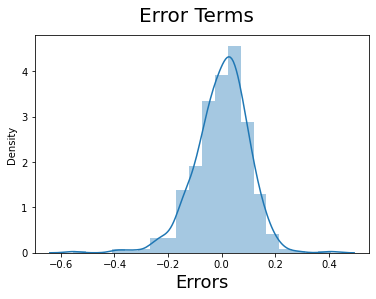

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms are following normal distribution

#### Multi Colinearity

In [66]:
vif(X_train_rfe)

,feature,vif
2,windspeed,3.92
1,workingday,3.20
3,spring,2.38
0,year,1.87
4,summer,1.77
6,jan,1.63
9,saturday,1.54
10,cloudy,1.54
7,nov,1.22
8,sept,1.20


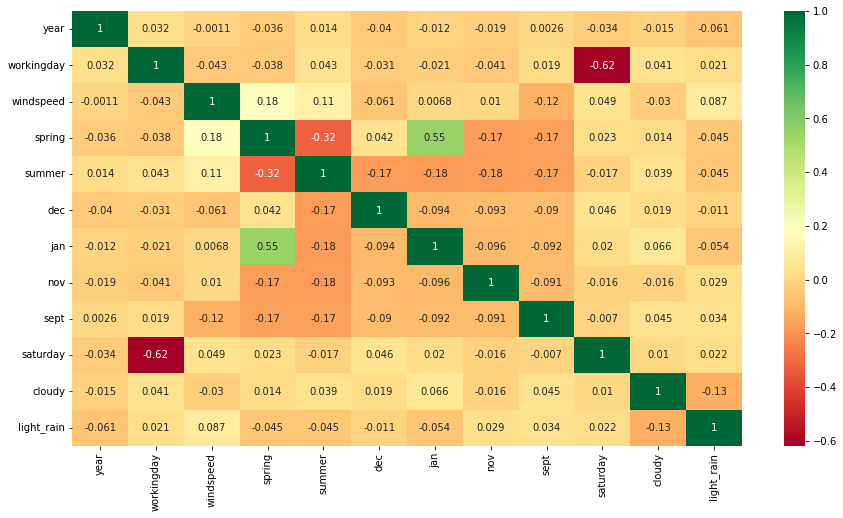

In [67]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 and there is no multicolinearity

#### Homoscedasticity

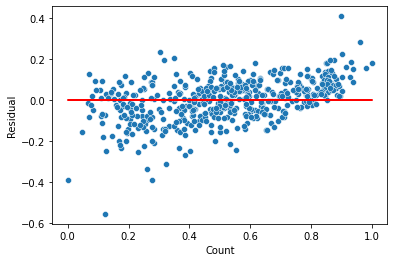

In [68]:
y_train_pred = lr_9.predict(X_train_rfe_sm)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Data is more spreaded to left bottom side.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. seventh model.

In [69]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [70]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy,light_rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [71]:
y_test = df_test.pop('cnt')
X_test = df_test[X_train.columns[rfe.support_]]

In [72]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test = X_test.drop(['atemp', 'may', 'feb', 'holiday', 'humidity', 'temp', 'jul', 'winter'], axis = 1)

In [73]:
# Adding constant variable to test dataframe
X_test_m9 = sm.add_constant(X_test)

In [74]:
# Making predictions using the seventh model

y_pred_m9 = lr_9.predict(X_test_m9)

In [75]:
r_square_test = r2_score(y_true=y_test, y_pred=y_pred_m9)
round(r_square_test,3)

0.783

In [76]:
X_test_m9.columns

Index(['const', 'year', 'workingday', 'windspeed', 'spring', 'summer', 'dec',
       'jan', 'nov', 'sept', 'saturday', 'cloudy', 'light_rain'],
      dtype='object')

In [77]:
nume=(1-r_square_test)*(y_test.shape[0]-1)
deno=y_test.shape[0]-len(X_test.columns)-2
adj_r_square = 1-nume/deno
round(adj_r_square,3)

0.77

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

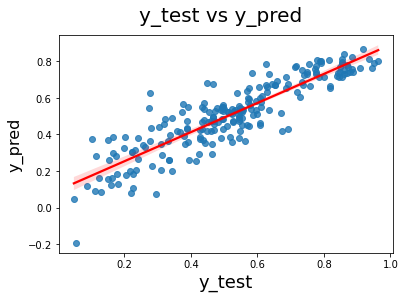

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred_m9, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      
plt.show()


We can see that the equation of our best fitted line is:

$ cnt = year \times 0.2457 + workingday \times 0.0570 + windspeed \times -0.1926 + spring \times -0.2381 + summer \times -0.0403 + dec \times -0.1186 + jan \times -0.1231 + nov \times -0.1127 + sept \times 0.0558 + saturday \times 0.0665 + cloudy \times -0.0901 + light\_rain \times -0.3207 $


## Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.798
- Test dataset R^2           : 0.783
- Train dataset Adjusted R^2 : 0.793
- Test dataset Adjusted R^2  : 0.77

Demand of bikes depend on year, workingday, windspeed, spring, summer, dec, jan, nov, sept, saturday, cloudy and light_rain.